### Data Source
##### Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: 
##### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). 17 feature and 1 class column (identifying observation as a star, galaxy or quasar)

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import warnings
# warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 
re: obsv_model_InitDataAnalysis.ipynb for initial data review.

In [3]:
df = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])

### Decision Tree

In [4]:
from sklearn import tree

In [5]:
target = df['class']
target_names = ['GALAXY','QSO','STAR']

In [6]:
data = df.drop("class", axis=1)
feature_names = data.columns
data.head()

,ra,dec,u,g,r,i,z,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590


In [7]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [20]:
# SVM linear classifier
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Decision Tree Classifier Score: %.2f%%" % (score*100))

Decision Tree Classifier Score: 98.70%


In [9]:
importance = model.feature_importances_

In [10]:
dt_zip = sorted(zip(importance, feature_names), reverse=True)

In [11]:
# summarize feature importance
dt_zip

[(0.9770143662262047, 'redshift'),
 (0.008572403275510584, 'u'),
 (0.006495827463954596, 'g'),
 (0.0021427712665556013, 'i'),
 (0.0017729580321590786, 'ra'),
 (0.001473424685003728, 'dec'),
 (0.0013412874752072427, 'z'),
 (0.0011869615754045392, 'r')]

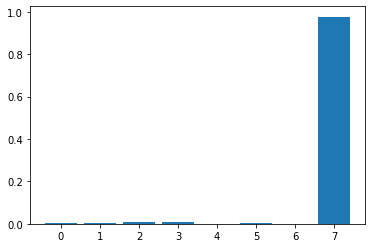

In [12]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Redshift is the most significant feature.

### Random Forest

In [19]:
# from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, max_depth=3)
rf = rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Score: %.2f%%" % (rf_score*100))

Random Forest Classifier Score: 97.30%


In [14]:
rf_zip = sorted(zip(rf.feature_importances_, feature_names), reverse=True)   

In [15]:
# summarize feature importance
rf_zip

[(0.5503848032047488, 'redshift'),
 (0.109332134197499, 'z'),
 (0.10202065516337912, 'i'),
 (0.08250688473591107, 'r'),
 (0.07715201856868022, 'u'),
 (0.07385136228254466, 'g'),
 (0.0028786738321848787, 'ra'),
 (0.0018734680150521831, 'dec')]

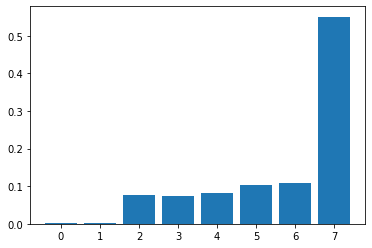

In [16]:
# plot feature importance
plt.bar([x for x in range(len(rf.feature_importances_))], rf.feature_importances_)
plt.show()

Redshift is the most significant feature.